# **Medical Cost Analysis Project**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [17]:
df = pd.read_csv("insurance.csv")
temp = df #if i need it for graphics
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


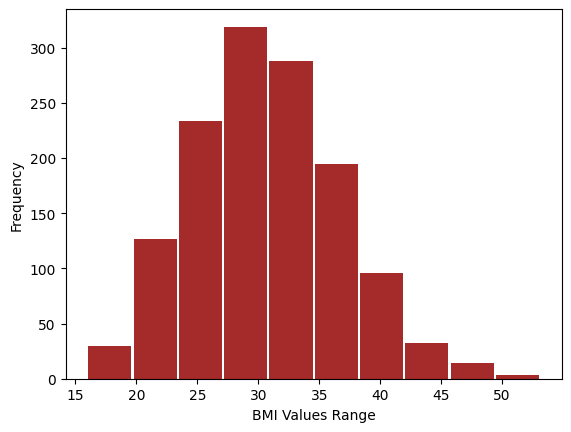

In [18]:
plt.hist(temp['bmi'],rwidth=0.95,color='brown')
plt.xlabel('BMI Values Range')
plt.ylabel('Frequency')
plt.show()

When we look at the this graphic, we can see the distribution of BMI. Most common value range observed between about 27 and 31, and least 50 and more.

Correlation: 0.7872514304984779


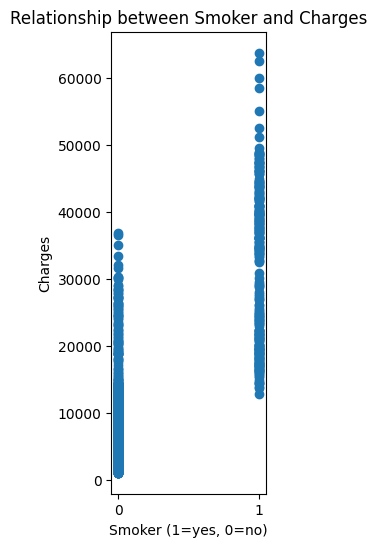

In [19]:
temp['smoker'] = temp['smoker'].map({'yes': 1, 'no': 0})
correlation = temp['smoker'].corr(temp['charges'])
plt.figure(figsize=(2,6))
plt.scatter(temp['smoker'], temp['charges'])
plt.title('Relationship between Smoker and Charges')
plt.xlabel('Smoker (1=yes, 0=no)')
plt.ylabel('Charges')
plt.xticks([0, 1], ['0', '1']) #shows only 0 and 1
print("Correlation:", correlation)

Correlation result is 0.7 this means values in the "smoker" column increase, values in the "charges" column also tend to increase.

region  northeast  northwest  southeast  southwest
smoker                                            
0             257        267        273        267
1              67         58         91         58


Text(0, 0.5, 'Count')

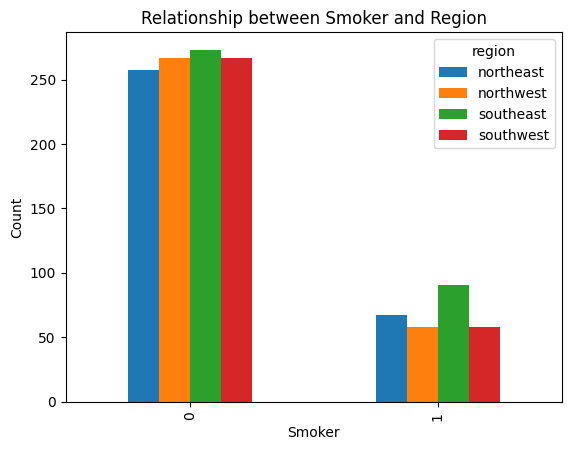

In [20]:
cross_table = pd.crosstab(temp['smoker'], temp['region'])
print(f"{cross_table}")
cross_table.plot(kind='bar', stacked=False)
plt.title('Relationship between Smoker and Region')
plt.xlabel('Smoker')
plt.ylabel('Count')

We compute a simple cross tabulation of more than two factors with crosstab. There is no relationship between the regions and smokers. But obviously in all regions non-smokers count is much more.

Text(0, 0.5, 'BMI')

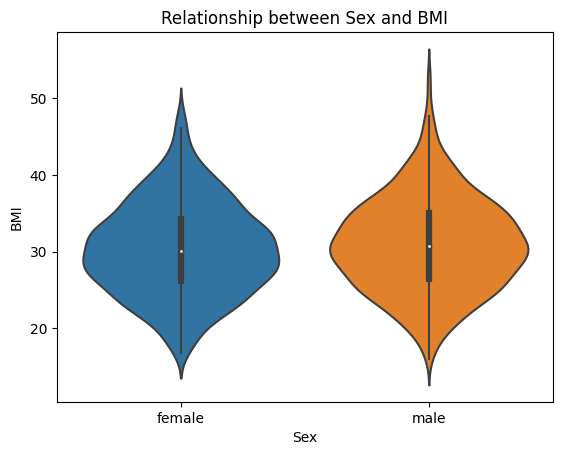

In [21]:
sns.violinplot(x='sex',y='bmi',data=temp)
plt.title('Relationship between Sex and BMI')
plt.xlabel('Sex')
plt.ylabel('BMI')

By the sex, we found the density of BMI interval with violin plot. It is seen predominantly in female and male with a BMI of around 30.

region    northeast  northwest  southeast  southwest
children                                            
0               147        132        157        138
1                77         74         95         78
2                51         66         66         57
3                39         46         35         37
4                 7          6          5          7
5                 3          1          6          8



<Axes: xlabel='children'>

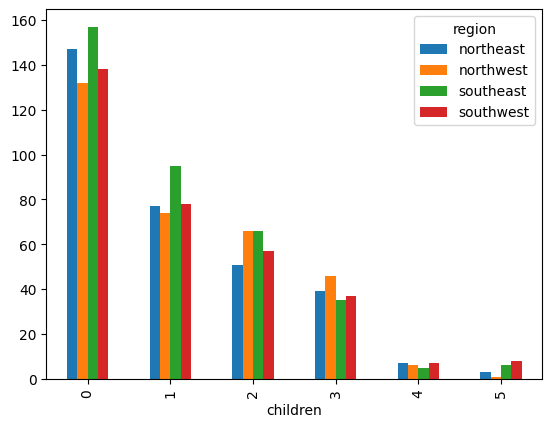

In [22]:
cross_table = pd.crosstab(temp['children'],temp['region'])
print(f"{cross_table}\n")
cross_table.plot(kind='bar')

After adding the number of all children by region, the result is: most children live in **southeast**(382). And southwest(371), northwest(369), northeast(339) respectively.

Text(0, 0.5, 'BMI')

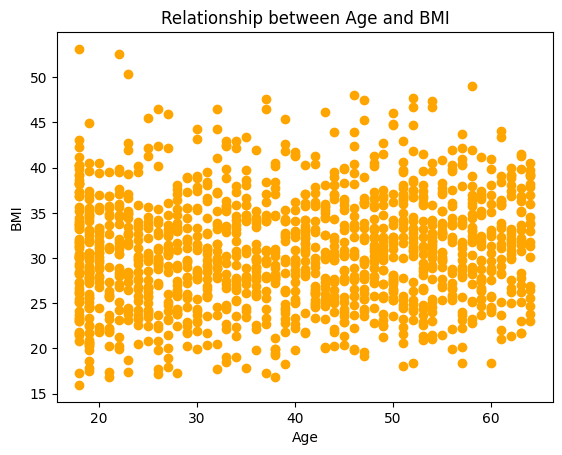

In [23]:
plt.scatter(temp['age'],temp['bmi'],color='orange')
plt.title('Relationship between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')

There is no correlation between age and BMI. All BMI values are randomly distributed. There may be different factors affecting the BMI values.

Text(0, 0.5, 'BMI')

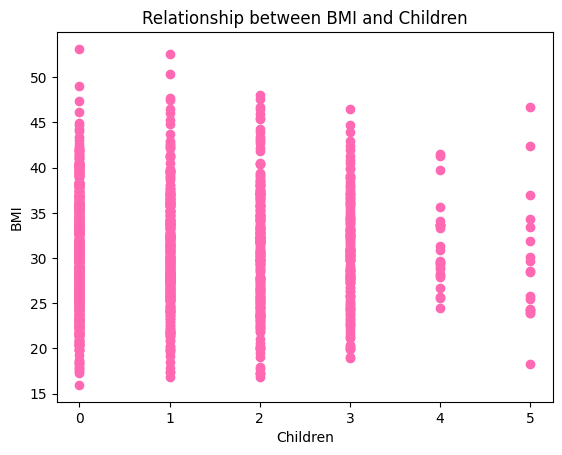

In [24]:
plt.scatter(temp['children'],temp['bmi'],color = 'hotpink')
plt.title('Relationship between BMI and Children')
plt.xlabel('Children')
plt.ylabel('BMI')

As the number of children increases, it is seen that the bmi value approaches the middle values. It moves away from the highs and low bmi values.

<Axes: ylabel='bmi'>

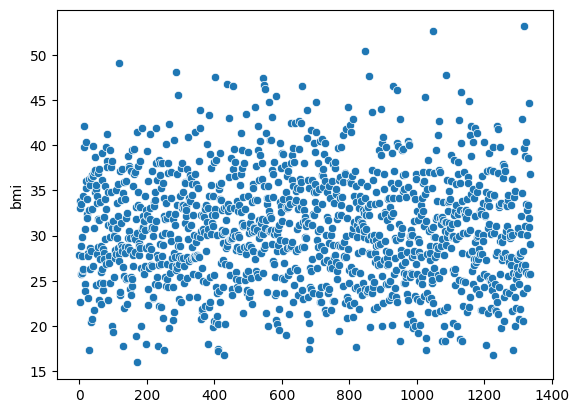

In [25]:
sns.scatterplot(temp['bmi'])

There are several values ​​above 50. We can assume an outlier value.

Text(0, 0.5, 'Charges')

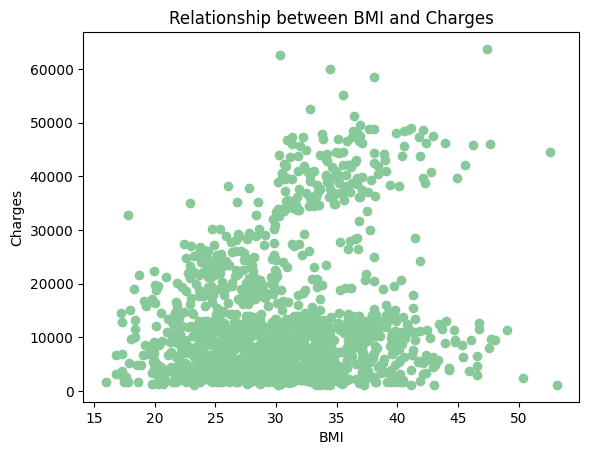

In [26]:
plt.scatter(temp['bmi'],temp['charges'],color = '#88c999')
plt.title('Relationship between BMI and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

Until the BMI value is around 40, the weighted "charges" value is below 30.000 especially if it's below 15.000 density is higher. Charges over 30,000 are more common when bmi is between 30 and 45. When the BMI value is 45 to 50 or more charges is under 20.000 or higher 40.000.

Text(0, 0.5, 'BMI')

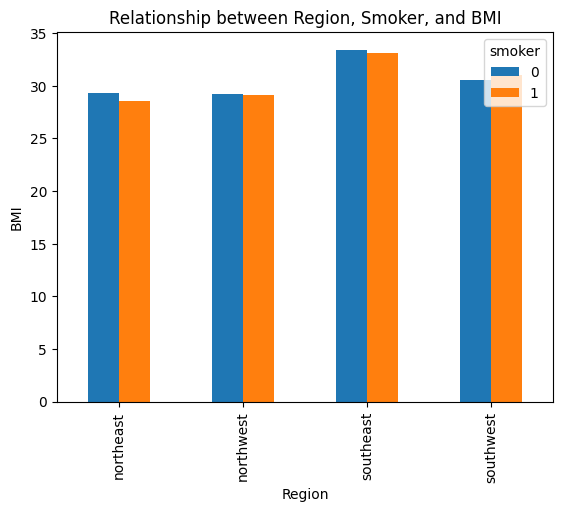

In [27]:
grouped = temp.groupby(['region', 'smoker'])['bmi'].mean().unstack()
grouped.plot(kind='bar')
plt.title('Relationship between Region, Smoker, and BMI')
plt.xlabel('Region')
plt.ylabel('BMI')

Bmi values of smokers and non-smokers in all regions are close to each other. There is no significant correlation.

In [28]:
#using encoding and one hot encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [29]:
#change objects (sex, smoker, region)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

one_hot_encoded = pd.get_dummies(df['region'], prefix='region')
df = pd.concat([df, one_hot_encoded], axis=1)

""" Label Encoding is enough for sex and smokers because there are only 2 options.
When we convert the region from categorical to integer, more than two options appear,
so we have to use one-hot encoding as well. """

df

,age,sex,bmi,children,smoker,region,charges,region_0,region_1,region_2,region_3
0,19,0,27.900,0,1,3,16884.92400,0,0,0,1
1,18,1,33.770,1,0,2,1725.55230,0,0,1,0
2,28,1,33.000,3,0,2,4449.46200,0,0,1,0
3,33,1,22.705,0,0,1,21984.47061,0,1,0,0
4,32,1,28.880,0,0,1,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,2,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,3,2007.94500,0,0,0,1


In [30]:
y = df['charges']
X = df.drop(['charges'], axis = 1)

In [31]:
X

,age,sex,bmi,children,smoker,region,region_0,region_1,region_2,region_3
0,19,0,27.900,0,1,3,0,0,0,1
1,18,1,33.770,1,0,2,0,0,1,0
2,28,1,33.000,3,0,2,0,0,1,0
3,33,1,22.705,0,0,1,0,1,0,0
4,32,1,28.880,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,1,0,0
1334,18,0,31.920,0,0,0,1,0,0,0
1335,18,0,36.850,0,0,2,0,0,1,0
1336,21,0,25.800,0,0,3,0,0,0,1


In [32]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   region_0  1338 non-null   uint8  
 7   region_1  1338 non-null   uint8  
 8   region_2  1338 non-null   uint8  
 9   region_3  1338 non-null   uint8  
dtypes: float64(1), int64(5), uint8(4)
memory usage: 68.1 KB


In [34]:
#split dataset into X_train,X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
#Scale the dataset by normalizing it
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Try diffrent models and choose the best
# 1) LinearRegresyon

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Linear Regresyon MSE: {mse}")
print(f"Linear Regresyon R2 Score: {r2}")

Linear Regresyon MSE: 36962936.56978373
Linear Regresyon R2 Score: 0.8098328707235863


In [37]:
# 2) Polinomal Regresyon
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Polinomal Regresyon MSE: {mse}")
print(f"Polinomal Regresyon R2 Score: {r2}")

Polinomal Regresyon MSE: 23582435.529214125
Polinomal Regresyon R2 Score: 0.8786729496594488


In [38]:
# 3) Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Random Forest Regresyon MSE: {mse}")
print(f"Random Forest Regresyon R2 Score: {r2}")

Random Forest Regresyon MSE: 22418418.682784174
Random Forest Regresyon R2 Score: 0.8846615902453248


In [39]:
# 4) Support Vector Machine
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"SVM Regresyon MSE: {mse}")
print(f"SVM Regresyon R2 Score: {r2}")

SVM Regresyon MSE: 201819261.07920137
SVM Regresyon R2 Score: -0.03832089854822174


In [40]:
# 5) Lasso Regresyon
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.01, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Lasso Regresyon MSE: {mse}")
print(f"Lasso Regresyon R2 Score: {r2}")

Lasso Regresyon MSE: 36962930.835402675
Lasso Regresyon R2 Score: 0.8098329002258631


In [41]:
# Optimize parameters with Grid Search
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(random_state = 42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# cross validation = 5
grid_search = GridSearchCV(model, param_grid, cv=5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_mse = -grid_search.best_score_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best MSE:", best_mse)
print("Best R2 Score:", r2)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best MSE: 23044934.331801496
Best R2 Score: 0.8975762416366259


In [42]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation metrics for the best model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")

Evaluation metrics for the best model:
Mean Squared Error (MSE): 19908187.592827138
Mean Absolute Error (MAE): 2573.2391144592
R2 Score: 0.8975762416366259
